<a href="https://colab.research.google.com/github/SeloPeylo/h-da-Mashine-Learning-Praktikum/blob/master/practice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading file and dropping the columns 'Region' and 'Channel'

In [ ]:
# https://keras.io/
!pip install -q keras

import numpy as np
import pandas as pd
import sklearn as skl

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# See the relevance of a feature

In [ ]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Scaling Features

In [ ]:
from scipy import stats

# Scale the data using the natural logarithm
print(data.head())
data = np.log(data)
print(data.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   9.446913  9.175335  8.930759  5.365976          7.891331    7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554    7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079    8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511    7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682    8.553525


# Clustering
We reduced our Data with PCA from many dimensions to 3 dimensions. We then created several Models ranging from 2 Clusters to 5 Clusters and calculated the Score to see how many Clusters is the most efficient.

**Silhoutte Score:**
The Silhouette score uses the mean distance from one cluster to the other and the mean distance of the nearest clusters for each sample.
1 is the best value and -1 is the worst. Values near 0 mean that clusters are overlapping.

**Calinski-Harabaz Score:**
If the truth labels are not known like in our dataset, the Calinski-Harabaz Score can be used to evaluate the model, where a higher Calinski-Harabaz score relates to a model with better defined clusters.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


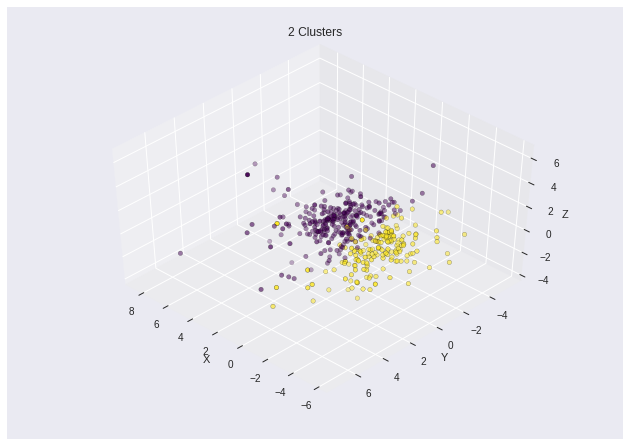

Silhouette Score:  0.3638314049744022
Calinski Harabaz Score:  257.7682106566257 




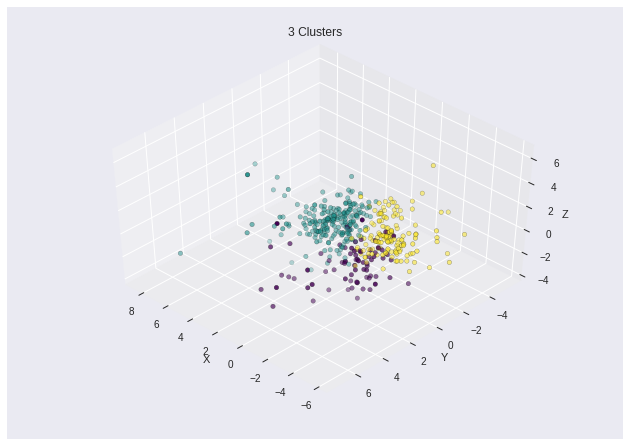

Silhouette Score:  0.3287049568178487
Calinski Harabaz Score:  215.86189177569625 




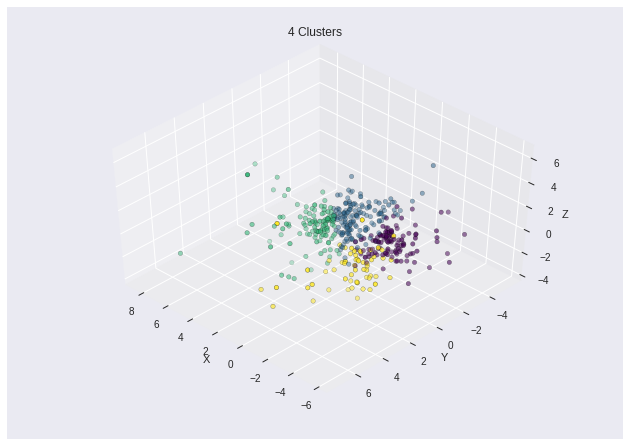

Silhouette Score:  0.2562081471490574
Calinski Harabaz Score:  195.85972785330532 




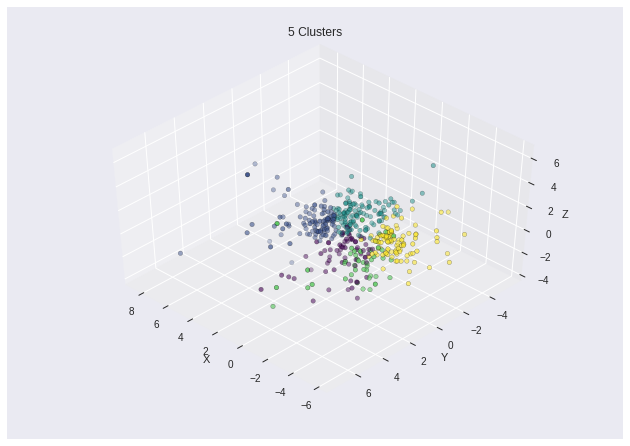

Silhouette Score:  0.27444650102085916
Calinski Harabaz Score:  181.84074541336412 




In [ ]:
from sklearn.decomposition import PCA

#Reducing our Data to 3 Dimensions
pca = PCA(n_components=3)
pca.fit(data)
X_pca = pca.transform(data)

for i in range(2,6):
  kmeans = KMeans(n_clusters= i) # 2 Clusters have the highest Score
  kmeans.fit(X_pca)
  y_kmeans = kmeans.predict(X_pca)
  
  fig = plt.figure(i, figsize=(9, 6))
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  
  ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, edgecolor='k', cmap='viridis')
  
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  number = str(i)
  title =  number + ' Clusters'
  ax.set_title(title)
  ax.dist = 12
  fig.show()
  plt.show()
  #The ground truth labels are not known, so we use calinski harabaz
  score = skl.metrics.calinski_harabaz_score(X_pca, y_kmeans)
  #Silhouette Score is also used
  silscore =  skl.metrics.silhouette_score(X_pca, y_kmeans, metric='euclidean')
  print('Silhouette Score: ', silscore)
  print('Calinski Harabaz Score: ', score, '\n\n')

# Using different Algorithms for Clustering and calculating the Score
We have Few Clusters (with max. 3 Clusters we get good Score). The Cluster Sizes are pretty much even. So KMeans is good. Another good Alternative is Spectral clustering because we have a small sample (441 rows) and very few clusters. After calculating the Scores we should see if it suits better.

To make a good comparison between algorithms we will also generate a model with every other algorithm.

/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)
/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


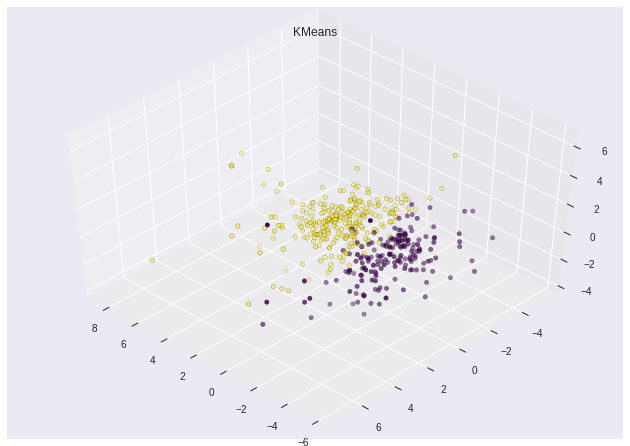

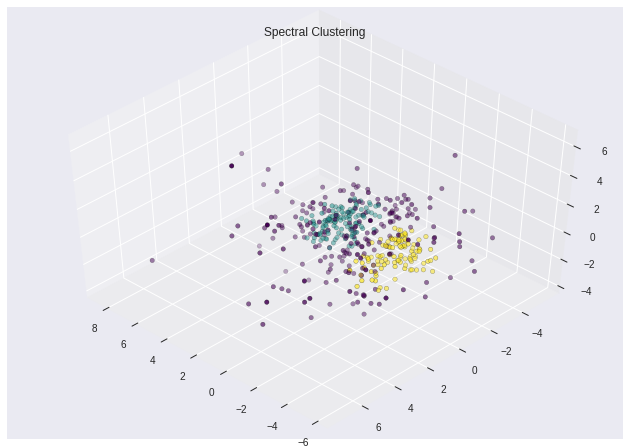

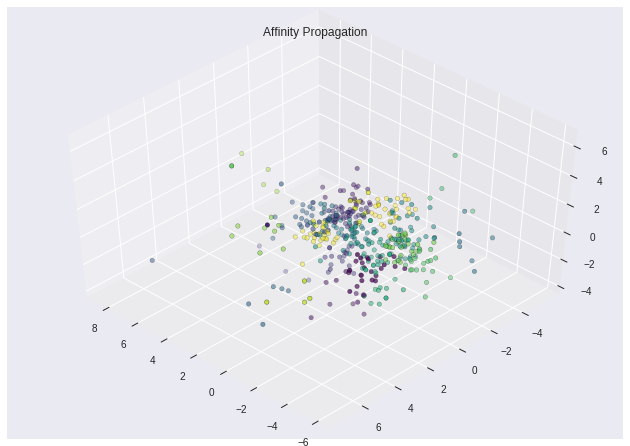

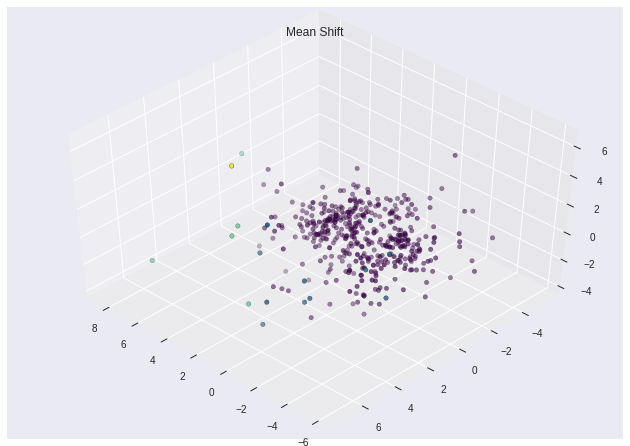

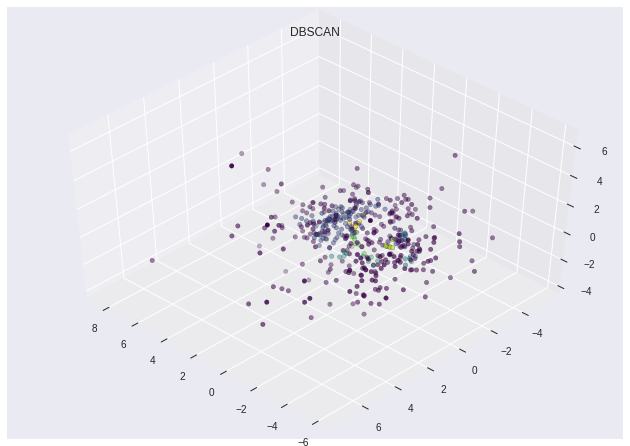

In [ ]:
from sklearn.decomposition import PCA

#Reducing our Data to 3 Dimensions
pca = PCA(n_components=3)
pca.fit(data)
X_pca = pca.transform(data)

kmeans = skl.cluster.KMeans(n_clusters = 2)
spec = skl.cluster.SpectralClustering(n_clusters = 3)
affin = skl.cluster.AffinityPropagation()
meanshift = skl.cluster.MeanShift(n_jobs=1)
dbs = skl.cluster.DBSCAN()


kmeans.fit(X_pca)
spec.fit(X_pca)
affin.fit(X_pca)
meanshift.fit(X_pca)
dbs.fit(X_pca)

y_kmeans = kmeans.predict(X_pca)
y_spec = spec.fit_predict(X_pca)
y_affin = affin.predict(X_pca)
y_meanshift = meanshift.predict(X_pca)
y_dbs = dbs.fit_predict(X_pca)

fig_kmeans = plt.figure(1, figsize=(9,6))
fig_spec = plt.figure(2, figsize=(9,6))
fig_affin = plt.figure(3, figsize =(9,6))
fig_meanshift = plt.figure(4, figsize=(9,6))
fig_dbs = plt.figure(5, figsize=(9,6))

ax_kmeans = Axes3D(fig_kmeans, rect=[0, 0, .95, 1], elev=48, azim=134)
ax_spec = Axes3D(fig_spec, rect=[0, 0, .95, 1], elev=48, azim=134)
ax_affin = Axes3D(fig_affin, rect=[0, 0, .95, 1], elev=48, azim=134)
ax_meanshift = Axes3D(fig_meanshift, rect=[0, 0, .95, 1], elev=48, azim=134)
ax_dbs = Axes3D(fig_dbs, rect=[0,0,.95,1], elev=48,azim=134)

ax_kmeans.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, edgecolor='k', cmap='viridis')
ax_kmeans.set_title('KMeans')
ax_spec.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_spec, edgecolor='k', cmap='viridis')
ax_spec.set_title('Spectral Clustering')
ax_affin.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_affin, edgecolor='k', cmap='viridis')
ax_affin.set_title('Affinity Propagation')
ax_meanshift.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_meanshift, edgecolor='k', cmap='viridis')
ax_meanshift.set_title('Mean Shift')
ax_dbs.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_dbs, edgecolor='k', cmap='viridis')
ax_dbs.set_title('DBSCAN')

fig_kmeans.show()
fig_spec.show()
fig_affin.show()
fig_dbs.show()
plt.show()

# Conclusion
As we can see KMeans has the best metrics, however Spectral Clustering was suitable on paper but the metrics show a lower score than expected. Looking at the Graph for Spectral Clustering it defines two Clusters very distinctively and assigns the Noise on the Edges as its own cluster. Maybe it is good depending on what we want to do with these clusters.
Affinity Propagation also looks interesting because it identifies many different clusters. The metrics are the best after KMeans and it looks like one of the better models if we want many clusters.

In [ ]:
clusters = [2,3,'?', '?','?']
silscores = [skl.metrics.silhouette_score(X_pca, y_kmeans, metric='euclidean'), 
             skl.metrics.silhouette_score(X_pca, y_spec, metric='euclidean'),
             skl.metrics.silhouette_score(X_pca, y_affin, metric='euclidean'),
             skl.metrics.silhouette_score(X_pca, y_meanshift, metric='euclidean'),
             skl.metrics.silhouette_score(X_pca, y_dbs, metric='euclidean')
            ]
calharscores = [skl.metrics.calinski_harabaz_score(X_pca, y_kmeans), 
                skl.metrics.calinski_harabaz_score(X_pca, y_spec),
                skl.metrics.calinski_harabaz_score(X_pca, y_affin),
                skl.metrics.calinski_harabaz_score(X_pca, y_meanshift),
                skl.metrics.calinski_harabaz_score(X_pca, y_dbs)
               ]

scores = pd.DataFrame(index=['Kmeans', 'Spectral-Clus.', 'Affinity-Prop.', 'Meanshift', 'DBSCAN'], columns=['Clusters', 'Silhouette-Sc.', 'Calinski Harabaz-Sc.'])
scores['Clusters'] = clusters
scores['Silhouette-Sc.'] = silscores
scores['Calinski Harabaz-Sc.'] = calharscores

display(scores)

,Clusters,Silhouette-Sc.,Calinski Harabaz-Sc.
Kmeans,2,0.363831,257.768211
Spectral-Clus.,3,0.114576,61.403679
Affinity-Prop.,?,0.263873,137.812375
Meanshift,?,0.408721,26.612240
DBSCAN,?,-0.236896,7.805755
